#**Import**

In [37]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import ComplementNB
from sklearn import metrics
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
#Polynomial regression
from sklearn.preprocessing import PolynomialFeatures
#Naive bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
#Knn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, confusion_matrix, plot_confusion_matrix
#RMSE
from sklearn.metrics import mean_squared_error
#logistic regression 
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

from sklearn.feature_extraction.text import TfidfVectorizer


# preliminary analysis

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


read data

In [39]:
dataset_train = pd.read_csv('/content/drive/MyDrive/cs506/train.csv')
dataset_test = pd.read_csv('/content/drive/MyDrive/cs506/test.csv')

Bar graph of score distribution

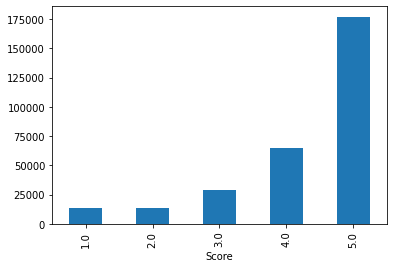

In [11]:
dataset_train.groupby('Score')['Id'].count().plot.bar()

# Feature_extraction 

In [41]:
# def getStemmedReview(review):
#     review = str(review)
#     review = review.replace('<br /><br />'," ")
    
#     # Step 1 : Tokenize
#     tokenizer = RegexpTokenizer(r'\w+')
#     wordsList = tokenizer.tokenize(review)
#     wordsList = [word.lower() for word in wordsList]
    
    
#     # Step 2 : Remove Stop Words
#     sw = set(stopwords.words('english'))
#     wordsList = [word for word in wordsList if word not in sw]
    
    
#     # Step 3 : Stemming
#     ps = PorterStemmer()
#     wordsList = [ps.stem(word) for word in wordsList]
#     #print(wordsList)
    
#     # return as a sentence
#     cleaned_review = " ".join(wordsList)
    
#     return cleaned_review

# function

def process(df):
    # This is where you can do all your processing
    df['Helpfulness'] = df['HelpfulnessNumerator'] / df['HelpfulnessDenominator']
    df['Helpfulness'] = df['Helpfulness'].fillna(0)

    df['UserAverage'] = df.groupby('UserId')['Score'].transform('mean')
    # fill na with average score
    df['UserAverage'] = df['UserAverage'].fillna(df['Score'].mean())

    df['ProductAverage'] = df.groupby('ProductId')['Score'].transform('mean')
    df['ProductAverage'] = df['ProductAverage'].fillna(df['Score'].mean())

    # fill na with summary
    df['Text'] = df['Text'].fillna(df['Summary'])

    return df
  


trainingSet = pd.read_csv("/content/drive/MyDrive/cs506/train.csv")

# Process the DataFrame
train_processed = process(trainingSet)

# Load test set
submissionSet = pd.read_csv("/content/drive/MyDrive/cs506/test.csv")

# Merge on Id so that the test set can have feature columns as well
testX= pd.merge(train_processed, submissionSet, left_on='Id', right_on='Id')
testX = testX.drop(columns=['Score_x'])
testX = testX.rename(columns={'Score_y': 'Score'})

# The training set is where the score is not null
trainX =  train_processed[train_processed['Score'].notnull()]

testX.to_csv("/content/drive/MyDrive/cs506/X_test.csv", index=False)
trainX.to_csv("/content/drive/MyDrive/cs506/X_train.csv", index=False)

In [16]:
dataset_train = pd.read_csv('/content/drive/MyDrive/cs506/process.csv')

In [15]:
dataset_train.to_csv('/content/drive/MyDrive/cs506/process.csv', index=None)
dataset_test.to_csv('/content/drive/MyDrive/cs506/process_test.csv', index=None)

In [17]:
dataset_test = pd.read_csv('/content/drive/MyDrive/cs506/process_test.csv')
dataset_train = pd.read_csv('/content/drive/MyDrive/cs506/process.csv')
Train = pd.read_csv('/content/drive/MyDrive/cs506/train.csv')

In [18]:
def process2(df):
  #calculate users' average rating
  df['UserAvg'] = df.groupby('UserId')['Score'].transform('mean')
  df['MovieAvg'] = df.groupby('ProductId')['Score'].transform('mean')
  df['UserIDs'] = df.groupby('UserId').size()
  df['MovieP'] = df.groupby('ProductId').size()
  return df

In [19]:
dataset_train.columns

Index(['Id', 'ProductId', 'UserId', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [20]:
dataset_train.head()

,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,0,0005019281,ADZPIG9QOCDG5,0.0,0.0,4.0,1.203984e+09,good version of a classic,This is a charming version of the classic Dick...
1,1,0005019281,A35947ZP82G7JH,0.0,0.0,3.0,1.388362e+09,Good but not as moving,It was good but not as emotionally moving as t...
2,2,0005019281,A3UORV8A9D5L2E,0.0,0.0,3.0,1.388362e+09,Winkler's Performance was ok at best!,"Don't get me wrong, Winkler is a wonderful cha..."
3,3,0005019281,A1VKW06X1O2X7V,0.0,0.0,5.0,1.202861e+09,It's an enjoyable twist on the classic story,Henry Winkler is very good in this twist on th...
4,4,0005019281,A3R27T4HADWFFJ,0.0,0.0,4.0,1.387670e+09,Best Scrooge yet,This is one of the best Scrooge movies out. H...


In [21]:
df = process2(dataset_train)
dataset_test

,Id,Score
0,5,NaN
1,11,NaN
2,17,NaN
3,46,NaN
4,47,NaN
...,...,...
299995,1697520,NaN
299996,1697522,NaN
299997,1697524,NaN
299998,1697527,NaN


In [22]:
X_train=pd.read_csv('/content/drive/MyDrive/cs506/train.csv').sample(n=500000, random_state=1)   
prediction=pd.read_csv('/content/drive/MyDrive/cs506/process.csv')

#using tfidf vectorizer on training data
vectorizer = TfidfVectorizer(stop_words='english', max_features=100)
X_train_vectors=vectorizer.fit_transform(X_train['Summary'].values.astype('U'))
X_train_dense=X_train_vectors.todense()
X_train_feature_names=vectorizer.get_feature_names()
X_train_vectorized=pd.DataFrame(X_train_dense, columns = X_train_feature_names)
print(X_train_vectorized.head())

ValueError: ignored

In [14]:
#using tfidf vectorizer on prediction data
vectorizer2=TfidfVectorizer(stop_words='english', max_features=100)
prediction_vectors=vectorizer2.fit_transform(prediction['Summary'].values.astype('U'))
prediction_dense=prediction_vectors.todense()
prediction_feature_names=vectorizer2.get_feature_names()
prediction_vectorized=pd.DataFrame(prediction_dense, columns=prediction_feature_names)
print(prediction_vectorized.head())

   acting  action  amazing  awesome  bad  beautiful      best  better  big  \
0     0.0     0.0      0.0      0.0  0.0        0.0  0.000000     0.0  0.0   
1     0.0     0.0      0.0      0.0  0.0        0.0  0.000000     0.0  0.0   
2     0.0     0.0      0.0      0.0  0.0        0.0  0.574119     0.0  0.0   
3     0.0     0.0      0.0      0.0  0.0        0.0  0.000000     0.0  0.0   
4     0.0     0.0      0.0      0.0  0.0        0.0  1.000000     0.0  0.0   

   blu  ...  war  watch  watching  way  western  wonderful  world  worst  \
0  0.0  ...  0.0    0.0       0.0  0.0      0.0        0.0    0.0    0.0   
1  0.0  ...  0.0    0.0       0.0  0.0      0.0        0.0    0.0    0.0   
2  0.0  ...  0.0    0.0       0.0  0.0      0.0        0.0    0.0    0.0   
3  0.0  ...  0.0    0.0       0.0  0.0      0.0        0.0    0.0    0.0   
4  0.0  ...  0.0    0.0       0.0  0.0      0.0        0.0    0.0    0.0   

   worth  wow  
0    0.0  0.0  
1    0.0  0.0  
2    0.0  0.0  
3    0.0  

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [23]:
from sklearn.ensemble import RandomForestClassifier

X_train = pd.read_csv('/content/drive/MyDrive/cs506/X_train.csv')
X_submission = pd.read_csv('/content/drive/MyDrive/cs506/X_test.csv')

# Split training set into training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(
        X_train.drop(['Score'], axis=1),
        X_train['Score'],
        test_size=1/4.0,
        random_state=0
    )
X_train_processed = X_train.drop(columns=['Id', 'ProductId', 'UserId', 'Text', 'Summary'])
X_test_processed = X_test.drop(columns=['Id', 'ProductId', 'UserId', 'Text', 'Summary'])
X_submission_processed = X_submission.drop(columns=['Id', 'ProductId', 'UserId', 'Text', 'Summary', 'Score'])

# Learn the model
model = KNeighborsClassifier(n_neighbors=20).fit(X_train_processed, Y_train)

# Predict the score using the model
Y_test_predictions = model.predict(X_test_processed)
X_submission['Score'] = model.predict(X_submission_processed)

result = []
for k in range(1, 31):
    print("k = ", k)
    # Learn the model
    # model = KNeighborsClassifier(n_neighbors=20).fit(X_train_processed, Y_train)
    model = RandomForestClassifier(max_depth=k, n_estimators=5).fit(X_train_processed, Y_train)

    # Predict the score using the model
    Y_test_predictions = model.predict(X_test_processed)
    X_submission['Score'] = model.predict(X_submission_processed)

    accuracy = accuracy_score(Y_test, Y_test_predictions)
    rmse = mean_squared_error(Y_test, Y_test_predictions)
    # Evaluate your model on the testing set
    print("Accuracy on testing set = ", accuracy)
    print("RMSE root mean square error on testing set", rmse)
    result.append((k, accuracy, rmse))

k =  1
Accuracy on testing set =  0.5975162291843071
RMSE root mean square error on testing set 1.728532451648455
k =  2
Accuracy on testing set =  0.5975162291843071
RMSE root mean square error on testing set 1.728532451648455
k =  3
Accuracy on testing set =  0.6216550407913659
RMSE root mean square error on testing set 1.1019716946897302
k =  4
Accuracy on testing set =  0.6463986667204279
RMSE root mean square error on testing set 0.9525825571549534
k =  5
Accuracy on testing set =  0.661653427953174
RMSE root mean square error on testing set 0.7935970323777267
k =  6
Accuracy on testing set =  0.6711691732860234
RMSE root mean square error on testing set 0.7497950351464323
k =  7
Accuracy on testing set =  0.668077900084674
RMSE root mean square error on testing set 0.7189495047242719
k =  8
Accuracy on testing set =  0.679408088383533
RMSE root mean square error on testing set 0.6542343722699353
k =  9
Accuracy on testing set =  0.6840718788220905
RMSE root mean square error on t

###Logistic regression 

In [24]:
trainx = X_train.drop(columns=['Text', 'Summary'])
clf = LogisticRegression(class_weight = 'balanced').fit(X_train_processed, Y_train)
LRpred = clf.predict(X_test_processed)
print(accuracy_score(Y_test, LRpred))
print(precision_recall_fscore_support(Y_test, LRpred, average='weighted'))
print(mean_squared_error(Y_test, LRpred))

0.5975162291843071
(0.3570256441386334, 0.5975162291843071, 0.4469759212661406, None)
1.728532451648455


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.5941327742085786


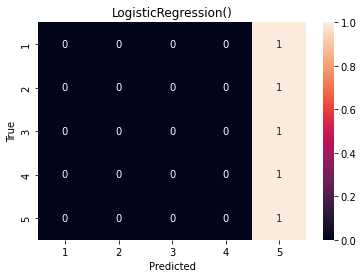

In [25]:
old = [0.5,1.5,2.5,3.5,4.5]
new = [1,2,3,4,5]
LGR = LogisticRegression()
LGR.fit(X_train_processed, Y_train)
LGR_prediction = LGR.predict(X_train_processed)
LGR_acc = accuracy_score(Y_train, LGR_prediction)
print(LGR_acc)

cm1 = confusion_matrix(Y_train, LGR_prediction, normalize='true')
sns.heatmap(cm1, annot=True)
plt.title('LogisticRegression()')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(old, new)
plt.yticks(old, new)
plt.show()

0.5941327742085786


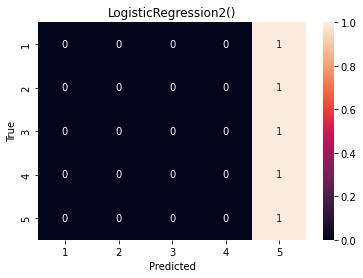

In [26]:
LGR2 = LogisticRegression(max_iter=400)
LGR2.fit(X_train_processed, Y_train)
LGR2_prediction = LGR.predict(X_train_processed)
LGR2_acc = accuracy_score(Y_train, LGR2_prediction)
print(LGR2_acc)

cm1 = confusion_matrix(Y_train, LGR2_prediction, normalize='true')
sns.heatmap(cm1, annot=True)
plt.title('LogisticRegression2()')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(old, new)
plt.yticks(old, new)
plt.show()

###Naive Bayes

In [27]:
clf = MultinomialNB()
clf.fit(X_train_processed, Y_train)
NBpred = clf.predict(X_test_processed)
print(accuracy_score(Y_test, NBpred))
print(precision_recall_fscore_support(Y_test, NBpred, average='weighted'))
print(mean_squared_error(Y_test, NBpred))

0.5682163353628213
(0.39676027192584273, 0.5682163353628213, 0.46133312824859823, None)
2.1475074929774336


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.5280637617268353


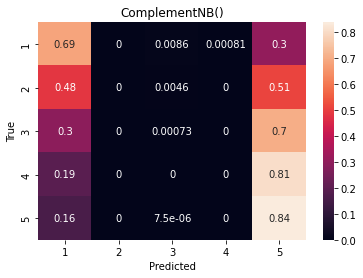

RMSE root mean square error on testing set 2.945498776914599


In [28]:
NB = ComplementNB()
NB.fit(X_train_processed, Y_train)
NB_prediction = NB.predict(X_train_processed)
NB_acc = accuracy_score(Y_train, NB_prediction)
print(NB_acc)

cm3 = confusion_matrix(Y_train, NB_prediction, normalize='true')
sns.heatmap(cm3, annot=True)
plt.title('ComplementNB()')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(old, new)
plt.yticks(old, new)
plt.show()

rmse = mean_squared_error(Y_train, NB_prediction)
print("RMSE root mean square error on testing set", rmse)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy on testing set =  0.6629649541346057
RMSE root mean square error on testing set: 0.8654111084976983


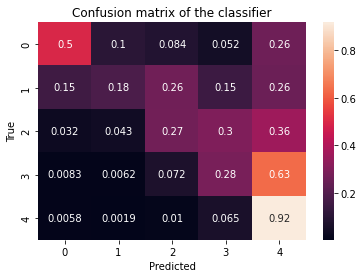

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from sklearn.feature_extraction.text import TfidfVectorizer

X_train = pd.read_csv("/content/drive/MyDrive/cs506/X_train.csv")
X_submission = pd.read_csv("/content/drive/MyDrive/cs506/X_test.csv")


trains_X = X_train.sample(frac=0.4, replace=True, random_state=1)
vector= TfidfVectorizer(max_df=0.9).fit(trains_X['Text'])
x_vec = vector.transform(X_submission['Text'])

tr_X,test_X,train_Y,test_Y = train_test_split(X_train_vectorized,X_train['Score'],test_size= 0.2)

model = LogisticRegression()

model.fit(tr_X,train_Y)

pred_Y = model.predict(test_X)

# Evaluate your model on the testing set
print("Accuracy on testing set = ", accuracy_score(test_Y, pred_Y))
print("RMSE root mean square error on testing set:" , mean_squared_error(test_Y, pred_Y))

# Plot a confusion matrix
cm = confusion_matrix(test_Y, pred_Y, normalize='true')
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

X_submission['Score']= model.predict(x_vec)

# Create the submission file
submission = X_submission[['Id', 'Score']]
submission.to_csv("/content/drive/MyDrive/cs506/submission.csv", index=False)